In [18]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [19]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"georgeedward","key":"afead40b9dc6c7b6362b651cbc0622be"}'}

In [20]:
!cp kaggle.json ~/.kaggle/

In [21]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-07-23 06:49:54           9641  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5884  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2183  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2469  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [23]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

 97% 415M/429M [00:03<00:00, 72.7MB/s]
100% 429M/429M [00:03<00:00, 126MB/s] 


In [24]:
!unzip ravdess-emotional-speech-audio.zip

Archive:  ravdess-emotional-speech-audio.zip
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Actor_01/03-01-03-01-02-02-01.wav  
  inflating: Actor_01/03-01-03-02-01-01-01.wav  
  inflating: Actor_01/03-01-03-02-01-02-01.wav  
  inflating: Actor_01/03-01-03-02-02-01-01.wav  
  inflating: Actor_01/03

In [31]:
import os
dir_list = os.listdir('RAV')
dir_list

['Actor_18',
 'Actor_03',
 'Actor_23',
 'Actor_05',
 'Actor_24',
 'Actor_16',
 'Actor_14',
 'Actor_11',
 'Actor_13',
 'Actor_02',
 'Actor_08',
 'Actor_19',
 'Actor_10',
 'Actor_15',
 'Actor_17',
 'Actor_22',
 'Actor_21',
 'Actor_06',
 'Actor_20',
 'Actor_04',
 'Actor_07',
 'Actor_01',
 'Actor_09',
 'Actor_12']

In [42]:
dir_list.sort()
emotion = []
gender = []
path = []
for i in dir_list:
  fname = os.listdir('RAV/' + i)
  for f in fname:
    part = f.split('.')[0].split('-')
    if len(part) <= 1:
      continue
    emotion.append(int(part[2]))
    temp = int(part[6])
    if temp%2 == 0:
        temp = "female"
    else:
        temp = "male"
    gender.append(temp)
    path.append('RAV/' + i + '/' + f)

In [44]:
import pandas as pd
import numpy as np
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] = RAV_df.gender + '_' + RAV_df.emotion
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
male_disgust        96
female_surprise     96
male_surprise       96
female_disgust      96
female_happy        96
female_sad          96
male_sad            96
female_angry        96
male_angry          96
male_happy          96
female_fear         96
male_fear           96
Name: labels, dtype: int64

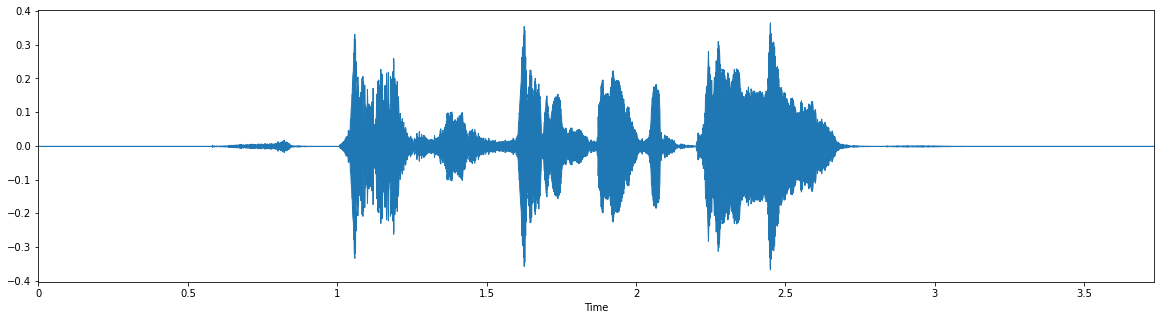

In [48]:
import librosa 
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5))
some_sound = 'RAV/Actor_14/03-01-03-02-02-02-14.wav'
data, sampling_rate = librosa.load(some_sound)
librosa.display.waveplot(data, sr = sampling_rate)

In [49]:
import IPython.display as ipd
ipd.Audio(some_sound)

In [55]:
RAV_df.labels.unique()

array(['male_neutral', 'male_surprise', 'male_disgust', 'male_angry',
       'male_fear', 'male_sad', 'male_happy', 'female_disgust',
       'female_surprise', 'female_angry', 'female_fear', 'female_neutral',
       'female_happy', 'female_sad'], dtype=object)

(5184,)

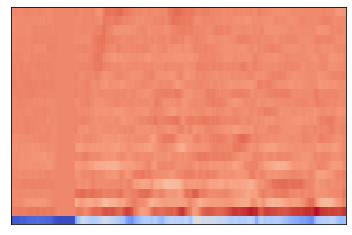

In [226]:
mfcc = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=24)
librosa.display.specshow(mfcc, sr=sampling_rate)
mfcc.flatten().shape

In [227]:
RAV_df

,labels,path
0,male_neutral,RAV/Actor_01/03-01-02-02-02-01-01.wav
1,male_surprise,RAV/Actor_01/03-01-08-02-01-01-01.wav
2,male_disgust,RAV/Actor_01/03-01-07-01-02-02-01.wav
3,male_angry,RAV/Actor_01/03-01-05-01-01-02-01.wav
4,male_fear,RAV/Actor_01/03-01-06-02-02-02-01.wav
...,...,...
1435,female_angry,RAV/Actor_24/03-01-05-01-02-02-24.wav
1436,female_happy,RAV/Actor_24/03-01-03-01-01-01-24.wav
1437,female_disgust,RAV/Actor_24/03-01-07-01-02-01-24.wav
1438,female_fear,RAV/Actor_24/03-01-06-02-02-01-24.wav


In [231]:
# DATA PREP
df = pd.DataFrame(columns=['mfcc'])
c = 0
column = 0
for i, path in enumerate(RAV_df.path):
  data, sampling_rate = librosa.load(path, res_type='kaiser_fast' ,duration=2.5 ,sr=44100 ,offset=0.5)
  sampling_rate = np.array(sampling_rate)
  mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=13), axis=0)
  df.loc[c] = [mfcc]
  c += 1
df.head()

,mfcc
0,"[-73.25497, -73.25497, -73.25497, -73.25497, -..."
1,"[-59.50986, -59.50986, -59.50986, -59.50986, -..."
2,"[-66.16611, -65.17809, -64.74064, -64.82608, -..."
3,"[-55.623817, -55.623817, -55.57038, -53.93866,..."
4,"[-35.372726, -36.900326, -38.971123, -38.44358..."


In [232]:
df.loc[0].shape

(1,)

In [233]:
df.describe

<bound method NDFrame.describe of                                                    mfcc
0     [-73.25497, -73.25497, -73.25497, -73.25497, -...
1     [-59.50986, -59.50986, -59.50986, -59.50986, -...
2     [-66.16611, -65.17809, -64.74064, -64.82608, -...
3     [-55.623817, -55.623817, -55.57038, -53.93866,...
4     [-35.372726, -36.900326, -38.971123, -38.44358...
...                                                 ...
1435  [-51.869053, -52.1725, -52.459904, -52.29874, ...
1436  [-64.67873, -64.67873, -64.67873, -64.67873, -...
1437  [-59.699104, -59.587376, -59.57129, -59.328453...
1438  [-45.194878, -45.194878, -45.194878, -45.19487...
1439  [-53.61997, -53.919113, -54.246677, -54.183247...

[1440 rows x 1 columns]>

In [234]:
df = pd.concat([RAV_df, pd.DataFrame(df['mfcc'].values.tolist())], axis=1)
df.head()

,labels,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
0,male_neutral,RAV/Actor_01/03-01-02-02-02-01-01.wav,-73.254967,-73.254967,-73.254967,-73.254967,-68.774429,-69.380402,-73.254967,-73.254967,-73.254967,-73.254967,-73.254967,-73.254967,-73.254967,-71.550507,-71.150093,-73.254967,-73.254967,-73.254967,-73.254967,-73.254967,-73.254967,-73.254967,-72.892570,-72.110245,-71.601654,-72.548325,-68.223480,-65.039780,-66.322540,-66.989174,-66.278496,-63.223858,-62.232712,-63.153812,-66.700325,-67.495857,-62.531063,-59.962212,...,-26.971525,-26.543959,-27.139015,-25.502880,-25.772991,-26.727673,-26.300547,-26.421478,-27.097673,-28.115561,-29.288706,-30.440657,-28.845123,-28.571676,-28.495470,-28.226532,-27.798300,-27.375248,-26.507423,-27.418438,-29.405931,-30.672132,-32.999538,-35.315018,-34.189796,-30.686113,-25.627596,-24.606859,-25.727398,-27.501854,-27.190418,-26.499784,-27.143423,-28.207598,-27.193054,-27.315336,-27.431173,-26.716448,-24.115793,-21.873394
1,male_surprise,RAV/Actor_01/03-01-08-02-01-01-01.wav,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.509861,-59.135113,-56.319187,-56.647625,...,-46.965340,-47.985428,-45.580540,-43.462532,-42.714638,-42.198174,-40.823528,-39.382835,-38.220028,-42.164646,-44.772060,-42.102512,-41.116470,-44.261726,-47.500568,-48.003662,-46.907051,-47.065422,-47.984211,-51.731262,-49.519569,-48.431416,-48.432682,-48.732037,-54.483807,-59.095791,-54.927597,-53.307686,-56.174202,-56.677307,-54.779484,-57.310745,-59.509861,-59.443264,-57.927753,-58.899788,-59.445732,-59.509861,-59.509861,-59.509861
2,male_disgust,RAV/Actor_01/03-01-07-01-02-02-01.wav,-66.166107,-65.178093,-64.740639,-64.826080,-61.850929,-63.990028,-66.804901,-66.020454,-64.604263,-65.701714,-66.804901,-66.804901,-66.804901,-66.804901,-66.804901,-66.804901,-66.804901,-66.804901,-66.804901,-66.804901,-66.804901,-66.804901,-66.804901,-66.804901,-66.804901,-65.483017,-58.259361,-57.520054,-62.967121,-64.269279,-66.310478,-66.919815,-65.603867,-64.738823,-65.127121,-66.408890,-66.804901,-66.558701,...,-34.506977,-32.537781,-30.757143,-31.482487,-29.875498,-29.069471,-29.109985,-28.985701,-26.923056,-27.475821,-26.978441,-28.932211,-30.070263,-29.067442,-30.179121,-31.229221,-31.893730,-33.992344,-35.699543,-36.789101,-37.911190,-39.026279,-39.258621,-40.238552,-41.735336,-41.850090,-43.138306,-43.959412,-44.769283,-46.676613,-48.220238,-47.565876,-48.008286,-50.184715,-51.803757,-51.937996,-51.970581,-51.551022,-54.941525,-56.443119
3,male_angry,RAV/Actor_01/03-01-05-01-01-02-01.wav,-55.623817,-55.623817,-55.570381,-53.938660,-52.901047,-54.380760,-54.381165,-55.478569,-55.612228,-55.888786,-56.325371,-55.911190,-55.338974,-55.669319,-56.570881,-55.922939,-54.779922,-54.909969,-55.577023,-55.726120,-54.907654,-53.485764,-53.345634,-52.592880,-52.825687,-52.718121,-52.396400,-52.269295,-53.228867,-53.610573,-54.927608,-55.304241,-53.658932,-49.533588,-50.934689,-53.353275,-51.128456,-52.044533,...,-28.178041,-27.796024,-28.192995,-23.121067,-20.369326,-20.003572,-23.098722,-26.873426,-27.250526,-29.204489,-31.074699,-30.051868,-30.254051,-28.497591,-28.037931,-28.793633,-26.743019,-26.283062,-25.908857,-25.532166,-24.810452,-27.268545,-25.159981,-26.159752,-29.257442,-29.432610,-28.612972,-29.852175,-31.673372,-32.434498,-33.353600,-31.432295,-33.775314,-36.061378,-38.142239,-38.785397,-39.644432,-41.592487,-45.736794,-42.881668
4,male_fear,RAV/Actor_01/03-01-06-02-02-02-01.wav,-35.372726

In [235]:
print(df.isna().sum())

labels    0
path      0
0         0
1         0
2         0
         ..
211       1
212       1
213       2
214       2
215       2
Length: 218, dtype: int64


In [236]:
df = df.fillna(0)
print(df.isna().sum())

labels    0
path      0
0         0
1         0
2         0
         ..
211       0
212       0
213       0
214       0
215       0
Length: 218, dtype: int64


In [237]:
df.shape

(1440, 218)

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )
X_train[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
296,-60.710178,-60.748802,-61.546249,-62.830914,-61.061489,-59.142353,-57.423943,-57.199043,-58.582523,-61.062263,-61.085857,-62.411430,-65.235603,-67.933502,-66.775085,-66.021126,-66.580971,-66.940727,-66.384064,-61.688190,-59.262283,-59.402481,-60.453476,-61.117825,-61.640316,-63.030880,-65.072449,-65.277931,-63.826714,-61.331238,-62.026997,-61.264095,-61.828590,-59.904076,-59.581257,-60.732010,-61.419514,-57.189537,-51.945396,-51.929626,...,-32.516098,-28.216160,-28.782169,-29.044346,-29.488884,-28.876411,-27.790457,-27.439596,-27.957397,-28.270342,-28.019033,-29.914663,-35.369888,-35.540134,-34.047787,-33.199619,-31.254225,-31.265083,-31.287554,-32.009300,-34.832706,-37.141731,-36.674301,-35.859932,-36.373703,-37.122074,-36.949860,-31.138826,-27.594482,-27.495756,-27.898790,-28.637075,-28.782127,-29.007996,-29.224230,-30.440552,-30.481890,-29.665823,-28.869358,-28.323982
1065,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,...,-42.789780,-44.082932,-43.808773,-41.763889,-41.371578,-43.969028,-48.656212,-47.470707,-47.342922,-50.306477,-51.505112,-52.759792,-50.831669,-52.395065,-53.806149,-54.222004,-53.824265,-52.665154,-53.508072,-55.325809,-55.238564,-53.635654,-54.637596,-55.348427,-55.340988,-51.596279,-37.640694,-35.305679,-36.462379,-35.937859,-35.769302,-40.396812,-41.098904,-40.112022,-40.397427,-41.164314,-43.230713,-42.779900,-25.901630,-17.300579
1219,-58.416267,-58.416267,-58.416267,-57.573441,-57.402443,-58.283535,-59.001949,-55.797073,-58.000679,-56.934551,-55.917393,-53.892605,-53.543964,-53.984966,-54.485344,-54.077347,-54.071041,-54.314163,-54.193394,-53.383614,-53.197823,-52.439083,-52.641258,-53.458397,-55.380737,-52.995445,-50.762676,-53.031662,-54.249504,-53.173119,-53.370644,-55.786972,-57.349693,-56.384048,-57.169624,-58.308212,-58.416267,-56.145439,-49.560299,-48.285702,...,-24.554024,-24.870668,-24.519194,-22.026234,-19.000559,-18.517754,-18.728355,-20.109715,-21.482271,-21.478163,-20.634813,-20.804659,-21.064201,-21.358442,-21.640615,-24.715792,-25.247715,-25.757402,-25.705441,-27.639696,-29.000742,-29.564150,-29.966297,-29.508392,-30.989017,-32.390232,-32.035656,-32.923096,-32.514103,-34.952671,-35.210400,-35.375332,-36.822365,-40.088497,-37.593662,-38.732346,-40.107178,-41.780193,-41.634853,-42.437050
1283,-46.549751,-49.894714,-52.149971,-53.195923,-53.348469,-52.534321,-51.635075,-50.806053,-49.999859,-50.401283,-50.692142,-51.644085,-53.167107,-52.507866,-50.608212,-50.823513,-50.954075,-49.711430,-49.166317,-48.824261,-47.874634,-47.683773,-47.039021,-46.577847,-45.584904,-46.520683,-46.328537,-48.694290,-50.796623,-48.816277,-49.194820,-50.208035,-52.473240,-52.677742,-51.010075,-51.063824,-53.023155,-53.384930,-53.345058,-53.462185,...,-35.046959,-34.086510,-33.272785,-32.851219,-33.012234,-32.746971,-34.327366,-35.764286,-37.547844,-38.443279,-37.299675,-37.473442,-37.734035,-39.267574,-40.585999,-41.753593,-42.873211,-42.282269,-41.337379,-43.015888,-43.519955,-43.900818,-45.374508,-46.431622,-45.580666,-45.020683,-45.262527,-47.062630,-46.694115,-47.214462,-50.531940,-49.673714,-48.065056,-48.738216,-52.110367,-53.139164,-53.865707,-51.622982,-51.382248,-52.000809
286,-60.447144,-58.060989,-56.796535,-57.869949,-63.228844,-62.001366,-59.456684,-59.739117,-61.301476,-61.207012,-59.426174,-59.598324,-60.927456,-58.848362,-58.777363,-

In [239]:
X_train[0]

296    -60.710178
1065   -55.340988
1219   -58.416267
1283   -46.549751
286    -60.447144
          ...    
1095   -62.037724
1130   -60.813942
1294   -50.638859
860    -49.373154
1126   -41.712730
Name: 0, Length: 1080, dtype: float64

In [240]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
296,-60.710178,-60.748802,-61.546249,-62.830914,-61.061489,-59.142353,-57.423943,-57.199043,-58.582523,-61.062263,-61.085857,-62.411430,-65.235603,-67.933502,-66.775085,-66.021126,-66.580971,-66.940727,-66.384064,-61.688190,-59.262283,-59.402481,-60.453476,-61.117825,-61.640316,-63.030880,-65.072449,-65.277931,-63.826714,-61.331238,-62.026997,-61.264095,-61.828590,-59.904076,-59.581257,-60.732010,-61.419514,-57.189537,-51.945396,-51.929626,...,-32.516098,-28.216160,-28.782169,-29.044346,-29.488884,-28.876411,-27.790457,-27.439596,-27.957397,-28.270342,-28.019033,-29.914663,-35.369888,-35.540134,-34.047787,-33.199619,-31.254225,-31.265083,-31.287554,-32.009300,-34.832706,-37.141731,-36.674301,-35.859932,-36.373703,-37.122074,-36.949860,-31.138826,-27.594482,-27.495756,-27.898790,-28.637075,-28.782127,-29.007996,-29.224230,-30.440552,-30.481890,-29.665823,-28.869358,-28.323982
1065,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,-55.340988,...,-42.789780,-44.082932,-43.808773,-41.763889,-41.371578,-43.969028,-48.656212,-47.470707,-47.342922,-50.306477,-51.505112,-52.759792,-50.831669,-52.395065,-53.806149,-54.222004,-53.824265,-52.665154,-53.508072,-55.325809,-55.238564,-53.635654,-54.637596,-55.348427,-55.340988,-51.596279,-37.640694,-35.305679,-36.462379,-35.937859,-35.769302,-40.396812,-41.098904,-40.112022,-40.397427,-41.164314,-43.230713,-42.779900,-25.901630,-17.300579
1219,-58.416267,-58.416267,-58.416267,-57.573441,-57.402443,-58.283535,-59.001949,-55.797073,-58.000679,-56.934551,-55.917393,-53.892605,-53.543964,-53.984966,-54.485344,-54.077347,-54.071041,-54.314163,-54.193394,-53.383614,-53.197823,-52.439083,-52.641258,-53.458397,-55.380737,-52.995445,-50.762676,-53.031662,-54.249504,-53.173119,-53.370644,-55.786972,-57.349693,-56.384048,-57.169624,-58.308212,-58.416267,-56.145439,-49.560299,-48.285702,...,-24.554024,-24.870668,-24.519194,-22.026234,-19.000559,-18.517754,-18.728355,-20.109715,-21.482271,-21.478163,-20.634813,-20.804659,-21.064201,-21.358442,-21.640615,-24.715792,-25.247715,-25.757402,-25.705441,-27.639696,-29.000742,-29.564150,-29.966297,-29.508392,-30.989017,-32.390232,-32.035656,-32.923096,-32.514103,-34.952671,-35.210400,-35.375332,-36.822365,-40.088497,-37.593662,-38.732346,-40.107178,-41.780193,-41.634853,-42.437050
1283,-46.549751,-49.894714,-52.149971,-53.195923,-53.348469,-52.534321,-51.635075,-50.806053,-49.999859,-50.401283,-50.692142,-51.644085,-53.167107,-52.507866,-50.608212,-50.823513,-50.954075,-49.711430,-49.166317,-48.824261,-47.874634,-47.683773,-47.039021,-46.577847,-45.584904,-46.520683,-46.328537,-48.694290,-50.796623,-48.816277,-49.194820,-50.208035,-52.473240,-52.677742,-51.010075,-51.063824,-53.023155,-53.384930,-53.345058,-53.462185,...,-35.046959,-34.086510,-33.272785,-32.851219,-33.012234,-32.746971,-34.327366,-35.764286,-37.547844,-38.443279,-37.299675,-37.473442,-37.734035,-39.267574,-40.585999,-41.753593,-42.873211,-42.282269,-41.337379,-43.015888,-43.519955,-43.900818,-45.374508,-46.431622,-45.580666,-45.020683,-45.262527,-47.062630,-46.694115,-47.214462,-50.531940,-49.673714,-48.065056,-48.738216,-52.110367,-53.139164,-53.865707,-51.622982,-51.382248,-52.000809
286,-60.447144,-58.060989,-56.796535,-57.869949,-63.228844,-62.001366,-59.456684,-59.739117,-61.301476,-61.207012,-59.426174,-59.598324,-60.927456,-58.848362,-58.777363,-

In [241]:
X_train = np.array(X_train)
X_train

array([[-60.71017838, -60.74880219, -61.54624939, ..., -29.66582298,
        -28.86935806, -28.32398224],
       [-55.34098816, -55.34098816, -55.34098816, ..., -42.7798996 ,
        -25.9016304 , -17.30057907],
       [-58.4162674 , -58.4162674 , -58.4162674 , ..., -41.78019333,
        -41.63485336, -42.43704987],
       ...,
       [-50.6388588 , -50.6388588 , -50.6388588 , ..., -50.6388588 ,
        -50.6388588 , -50.6388588 ],
       [-49.37315369, -49.37315369, -49.37315369, ..., -49.37315369,
        -49.37315369, -49.37315369],
       [-41.71273041, -42.64834213, -43.70793152, ..., -17.52299881,
         -9.39246559,  -4.53050232]])

In [242]:
y_train = np.array(y_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_test


array(['male_fear', 'male_sad', 'female_sad', 'female_neutral',
       'male_neutral', 'male_angry', 'female_sad', 'female_surprise',
       'female_surprise', 'male_angry', 'female_happy', 'female_angry',
       'male_sad', 'female_neutral', 'male_surprise', 'female_neutral',
       'female_happy', 'male_angry', 'female_sad', 'female_disgust',
       'female_angry', 'female_fear', 'female_neutral', 'male_fear',
       'female_happy', 'male_surprise', 'male_neutral', 'male_happy',
       'male_sad', 'male_happy', 'male_happy', 'male_disgust',
       'male_disgust', 'male_fear', 'male_neutral', 'male_neutral',
       'male_disgust', 'male_angry', 'female_sad', 'male_sad',
       'female_angry', 'male_angry', 'female_sad', 'male_sad',
       'male_angry', 'male_happy', 'female_surprise', 'male_fear',
       'female_happy', 'female_happy', 'male_angry', 'female_neutral',
       'male_neutral', 'female_disgust', 'female_fear', 'female_fear',
       'female_disgust', 'female_sad', 'male_neu

In [243]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical 
le = LabelEncoder()
y_train = np_utils.to_categorical(le.fit_transform(y_train))
y_test = np_utils.to_categorical(le.fit_transform(y_test))

In [244]:
y_train.shape

(1080, 14)

In [245]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [247]:

X_train.shape

(1080, 216)

In [260]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(1080, 216, 1, 1)

In [255]:
import tensorflow as tf
import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.callbacks import EarlyStopping
def get_model():
  model = Sequential()
  model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1))) 
  model.add(Activation('relu'))
  model.add(Conv1D(256, 8, padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
  model.add(MaxPooling1D(pool_size=(8)))
  model.add(Conv1D(128, 8, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(128, 8, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(128, 8, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(128, 8, padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
  model.add(MaxPooling1D(pool_size=(8)))
  model.add(Conv1D(64, 8, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(64, 8, padding='same'))
  model.add(Activation('relu'))
  model.add(Flatten())
  model.add(Dense(14)) # Target class number
  model.add(Activation('softmax'))
  return model

model = get_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 216, 256)          2304      
_________________________________________________________________
activation_27 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization_6 (Batch (None, 216, 256)          1024      
_________________________________________________________________
activation_28 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 27, 256)          

In [269]:
from keras.callbacks import EarlyStopping
#earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6),metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
68/68 [==============================] - 4s 26ms/step - loss: 0.0792 - accuracy: 0.9969 - val_loss: 1.4730 - val_accuracy: 0.4917
Epoch 2/100
68/68 [==============================] - 1s 14ms/step - loss: 0.0713 - accuracy: 0.9994 - val_loss: 1.4998 - val_accuracy: 0.4833
Epoch 3/100
68/68 [==============================] - 1s 12ms/step - loss: 0.0647 - accuracy: 0.9959 - val_loss: 1.5544 - val_accuracy: 0.4972
Epoch 4/100
68/68 [==============================] - 1s 12ms/step - loss: 0.0631 - accuracy: 0.9991 - val_loss: 1.5836 - val_accuracy: 0.4667
Epoch 5/100
68/68 [==============================] - 1s 12ms/step - loss: 0.0559 - accuracy: 0.9997 - val_loss: 1.5150 - val_accuracy: 0.4750
Epoch 6/100
68/68 [==============================] - 1s 13ms/step - loss: 0.0611 - accuracy: 1.0000 - val_loss: 1.5535 - val_accuracy: 0.4444
Epoch 7/100
68/68 [==============================] - 1s 13ms/step - loss: 0.0630 - accuracy: 0.9986 - val_loss: 1.5701 - val_accuracy: 0.4778
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f8fc69a04d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


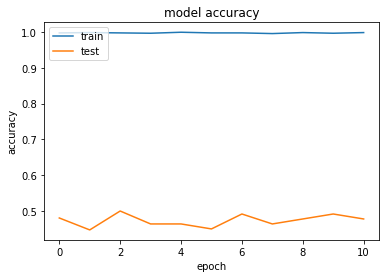

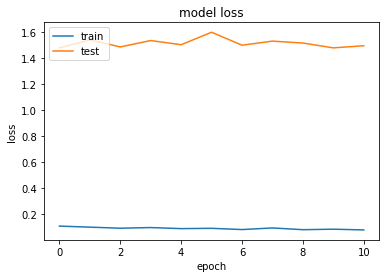

In [267]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


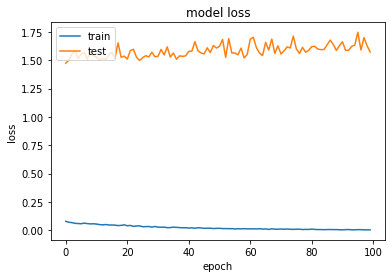

In [270]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [271]:
score = model.evaluate(X_test, y_test, verbose=0)

In [272]:
score

[1.572299838066101, 0.5027777552604675]

In [275]:
predictions = model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

predictions=predictions.argmax(axis=1)
predictions

23/23 [==============================] - 0s 5ms/step


array([ 7,  8,  6,  4, 11, 12,  5,  6,  6,  7,  2,  0, 11,  1, 10,  4,  3,
        9,  6,  4,  6,  3,  4, 10,  3, 13, 12, 10, 11,  2, 10, 10,  0, 10,
        3, 11,  1,  8,  4, 11,  1, 10,  5, 11, 10, 10,  6, 13,  3,  3,  0,
        6, 11,  1,  2,  3,  1,  4, 11,  7, 13,  5, 11,  0,  4,  6,  4, 11,
        0, 10,  0,  4,  6,  3, 10,  7, 13,  1,  9,  6, 11,  4,  6, 10,  4,
       11,  2,  2, 10,  3,  0,  4,  3,  4,  6, 11, 11, 10,  3,  7,  3, 12,
        9, 13,  7,  7,  3,  3,  8, 11,  4,  3,  6,  8,  2,  5, 11,  9,  8,
       11,  3,  4,  4,  7,  8,  8,  4, 11,  1,  7,  7, 10, 11, 11,  4, 12,
        0,  2,  4,  4, 10,  1,  9, 11,  8, 13, 12, 13,  9,  4,  0,  3,  4,
        7,  5, 12,  1, 11,  8,  4, 11, 12,  0,  5,  5,  2, 11,  0,  6,  4,
        4, 11,  1,  3,  9,  1, 10,  7,  3,  5,  5,  4,  3,  3, 13, 11,  1,
        4,  2,  4, 11,  5,  0,  3, 11,  0, 12,  0,  6,  6, 13, 11, 11,  4,
        8,  4, 13,  1, 10, 11,  5, 10,  4,  3,  4, 13,  3,  2,  5,  9,  0,
        8,  1,  5,  9,  2

In [276]:
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()

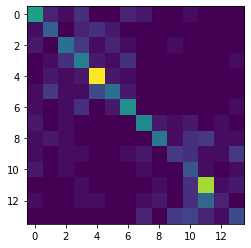

In [278]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(actual, predictions)
plt.imshow(conf)
plt.show()